---
# Лабораторна робота №8. Структура даних граф. Алгоритми на графах.
Author - Kyrylo Klingen
---

# Мета : засвоїти подання структури даних граф та головні алгоритми роботи з ними засобами Python.

# 1 . Для варіанта, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі.

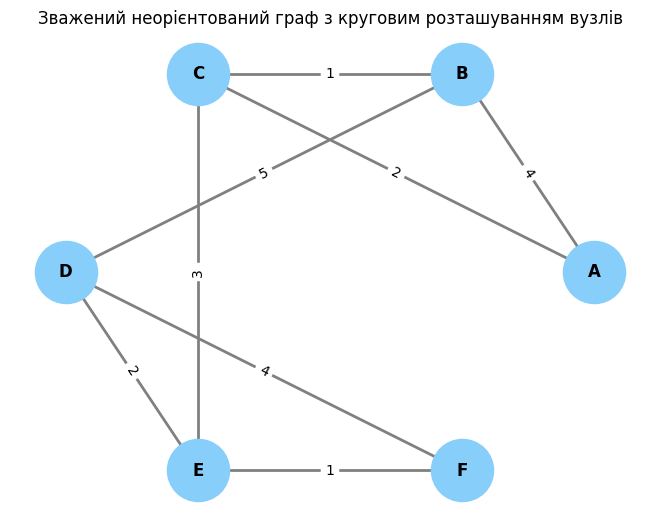

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import math

G = nx.Graph()

nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)

G.add_weighted_edges_from([
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 1),
    ('B', 'D', 5),
    ('C', 'E', 3),
    ('D', 'E', 2),
    ('D', 'F', 4),
    ('E', 'F', 1)
])

num_nodes = len(nodes)
pos = {}
radius = 2 
for i, node in enumerate(nodes):
    angle = 2 * math.pi * i / num_nodes
    x = radius * math.cos(angle)
    y = radius * math.sin(angle)
    pos[node] = (x, y)

edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='lightskyblue', node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Зважений неорієнтований граф з круговим розташуванням вузлів")
plt.axis('off')  
plt.show()

# 2 . Для свого варіанта реалізувати всі алгоритми, згідно з прикладами, наведеними вище.

# 2.1 . Алгоритм Дейкстри.

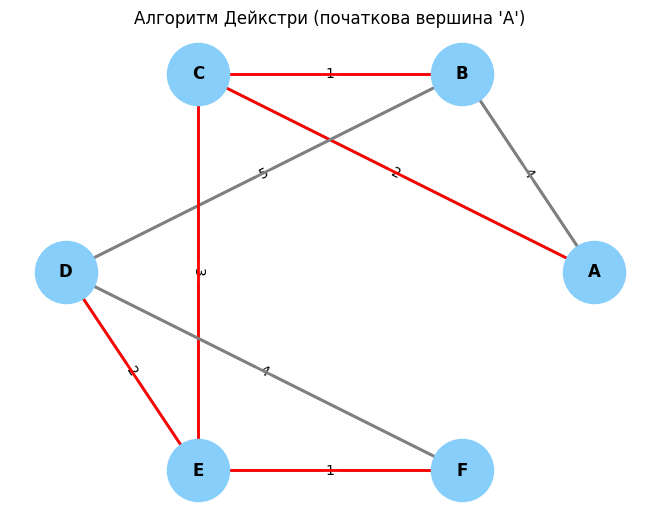

Найкоротші шляхи від вершини 'A': {'A': ['A'], 'B': ['A', 'C', 'B'], 'C': ['A', 'C'], 'E': ['A', 'C', 'E'], 'D': ['A', 'C', 'E', 'D'], 'F': ['A', 'C', 'E', 'F']}
Довжини найкоротших шляхів від вершини 'A': {'A': 0, 'C': 2, 'B': 3, 'E': 5, 'F': 6, 'D': 7}


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
edges = [('A', 'B', 4), ('A', 'C', 2), ('B', 'C', 1), ('B', 'D', 5), ('C', 'E', 3), ('D', 'E', 2), ('D', 'F', 4), ('E', 'F', 1)]
G.add_weighted_edges_from(edges)

source_node = 'A'
shortest_paths = nx.shortest_path(G, source=source_node, weight='weight')
shortest_path_lengths = nx.shortest_path_length(G, source=source_node, weight='weight')

pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='lightskyblue', node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

path_edges = set()
for target_node, path in shortest_paths.items():
    if target_node != source_node:
        for i in range(len(path) - 1):
            path_edges.add(tuple(sorted((path[i], path[i+1]))))

colored_edges = [(u, v) if tuple(sorted((u, v))) in path_edges else (u, v) for u, v in G.edges()]
edge_colors = ['red' if tuple(sorted(e)) in path_edges else 'gray' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=[e for e in G.edges()], edge_color=edge_colors, width=2)

plt.title(f"Алгоритм Дейкстри (початкова вершина '{source_node}')")
plt.axis('off')
plt.show()

print(f"Найкоротші шляхи від вершини '{source_node}': {shortest_paths}")
print(f"Довжини найкоротших шляхів від вершини '{source_node}': {shortest_path_lengths}")

# 2.2 . Алгоритм Белмана-Форда

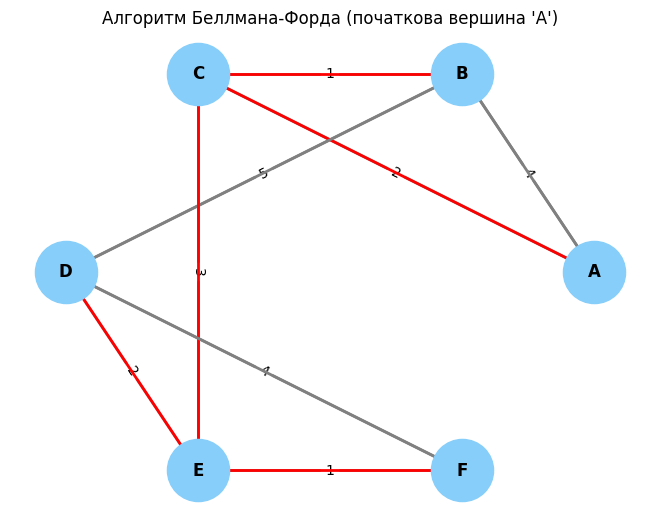

Найкоротші шляхи від вершини 'A': {'A': ['A'], 'B': ['A', 'C', 'B'], 'C': ['A', 'C'], 'D': ['A', 'C', 'E', 'D'], 'E': ['A', 'C', 'E'], 'F': ['A', 'C', 'E', 'F']}
Довжини найкоротших шляхів від вершини 'A': {'A': 0, 'B': 3, 'C': 2, 'D': 7, 'E': 5, 'F': 6}


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
edges = [('A', 'B', 4), ('A', 'C', 2), ('B', 'C', 1), ('B', 'D', 5), ('C', 'E', 3), ('D', 'E', 2), ('D', 'F', 4), ('E', 'F', 1)]
G.add_weighted_edges_from(edges)

source_node = 'A'
shortest_paths = nx.single_source_bellman_ford_path(G, source=source_node, weight='weight')
shortest_path_lengths = nx.single_source_bellman_ford_path_length(G, source=source_node, weight='weight')

pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='lightskyblue', node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

path_edges = set()
for target_node, path in shortest_paths.items():
    if target_node != source_node and path is not None:
        for i in range(len(path) - 1):
            path_edges.add(tuple(sorted((path[i], path[i+1]))))

colored_edges = [(u, v) if tuple(sorted((u, v))) in path_edges else (u, v) for u, v in G.edges()]
edge_colors = ['red' if tuple(sorted(e)) in path_edges else 'gray' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=[e for e in G.edges()], edge_color=edge_colors, width=2)

plt.title(f"Алгоритм Беллмана-Форда (початкова вершина '{source_node}')")
plt.axis('off')
plt.show()

print(f"Найкоротші шляхи від вершини '{source_node}': {shortest_paths}")
print(f"Довжини найкоротших шляхів від вершини '{source_node}': {shortest_path_lengths}")

# 2.3 . DFS

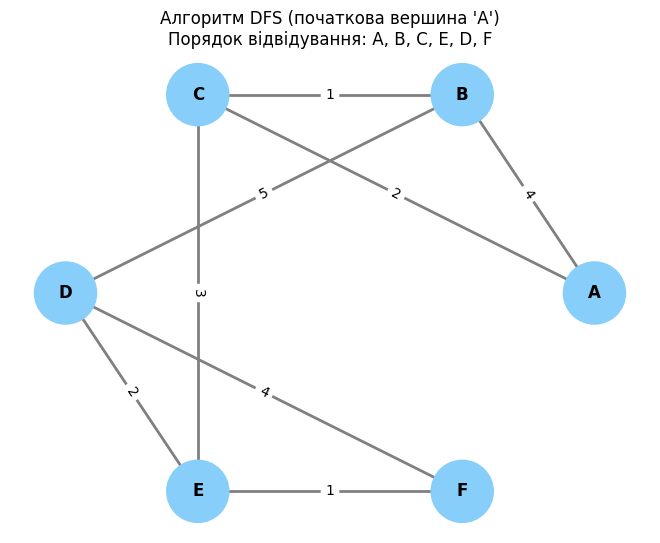

Порядок відвідування вузлів (DFS з початкової вершини 'A'): ['A', 'B', 'C', 'E', 'D', 'F']


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
edges = [('A', 'B', 4), ('A', 'C', 2), ('B', 'C', 1), ('B', 'D', 5), ('C', 'E', 3), ('D', 'E', 2), ('D', 'F', 4), ('E', 'F', 1)]
G.add_weighted_edges_from(edges)

start_node = 'A'
dfs_order = list(nx.dfs_preorder_nodes(G, source=start_node))
node_colors = ['lightskyblue' if node in dfs_order else 'lightgray' for node in G.nodes()]

pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Алгоритм DFS (початкова вершина '{start_node}')\nПорядок відвідування: {', '.join(dfs_order)}")
plt.axis('off')
plt.show()

print(f"Порядок відвідування вузлів (DFS з початкової вершини '{start_node}'): {dfs_order}")

# 2.4 . BFS

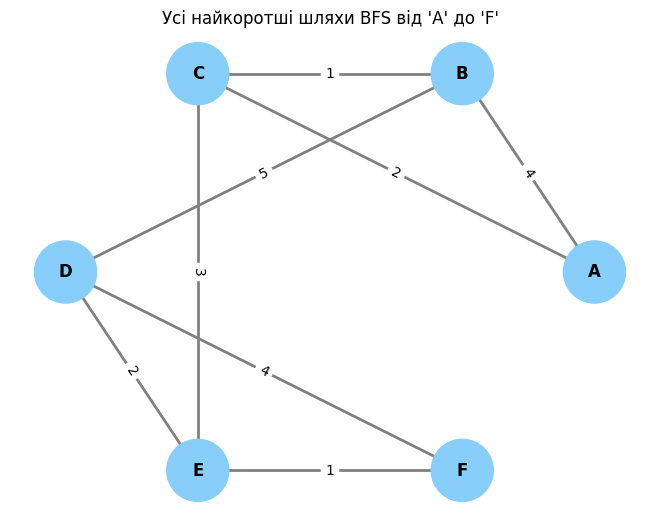

Усі найкоротші шляхи (за кількістю ребер) від 'A' до 'F':
  Шлях: ['A', 'B', 'D', 'F'], Ребра: (A, B, вага: 4), (B, D, вага: 5), (D, F, вага: 4)
  Шлях: ['A', 'C', 'E', 'F'], Ребра: (A, C, вага: 2), (C, E, вага: 3), (E, F, вага: 1)
  Шлях: ['A', 'B', 'C', 'E', 'F'], Ребра: (A, B, вага: 4), (B, C, вага: 1), (C, E, вага: 3), (E, F, вага: 1)
  Шлях: ['A', 'B', 'D', 'E', 'F'], Ребра: (A, B, вага: 4), (B, D, вага: 5), (D, E, вага: 2), (E, F, вага: 1)
  Шлях: ['A', 'C', 'B', 'D', 'F'], Ребра: (A, C, вага: 2), (C, B, вага: 1), (B, D, вага: 5), (D, F, вага: 4)
  Шлях: ['A', 'C', 'E', 'D', 'F'], Ребра: (A, C, вага: 2), (C, E, вага: 3), (E, D, вага: 2), (D, F, вага: 4)
  Шлях: ['A', 'B', 'C', 'E', 'D', 'F'], Ребра: (A, B, вага: 4), (B, C, вага: 1), (C, E, вага: 3), (E, D, вага: 2), (D, F, вага: 4)
  Шлях: ['A', 'C', 'B', 'D', 'E', 'F'], Ребра: (A, C, вага: 2), (C, B, вага: 1), (B, D, вага: 5), (D, E, вага: 2), (E, F, вага: 1)


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
edges = [('A', 'B', 4), ('A', 'C', 2), ('B', 'C', 1), ('B', 'D', 5), ('C', 'E', 3), ('D', 'E', 2), ('D', 'F', 4), ('E', 'F', 1)]
G.add_weighted_edges_from(edges)

def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next_node in set(graph.adj[vertex].keys()) - set(path):
            if next_node == goal:
                yield path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))

start_node = 'A'
target_node = 'F'
all_shortest_paths = list(bfs_paths(G, start_node, target_node))

node_colors = ['lightskyblue' if node in nx.shortest_path(G, source=start_node) else 'lightgray' for node in G.nodes()]
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Усі найкоротші шляхи BFS від '{start_node}' до '{target_node}'")
plt.axis('off')
plt.show()

if all_shortest_paths:
    print(f"Усі найкоротші шляхи (за кількістю ребер) від '{start_node}' до '{target_node}':")
    for path in all_shortest_paths:
        path_edges_with_weights = []
        for i in range(len(path) - 1):
            u, v = path[i], path[i+1]
            weight = G.get_edge_data(u, v).get('weight', 1)
            path_edges_with_weights.append(f"({u}, {v}, вага: {weight})")
        print(f"  Шлях: {path}, Ребра: {', '.join(path_edges_with_weights)}")
else:
    print(f"Шлях від '{start_node}' до '{target_node}' не знайдено за допомогою BFS.")

# 3 . Контрольні питання.

* Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи. -  граф — це математична структура, яка використовується для моделювання попарних відношень між об'єктами.Використовують граф у транспортних мережах , проектуваннях схем та в комп'ютерних мережах.
  
* Які головні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами - Бувають такі графи - зважені,незважені орієнтовні,неорієнтовні циклічні та ациклічні.Відмінності між орієнтовним та неорієнтовним графом : головні відмінність це напрямок ребер , у орієновних він є , а в неорієновних його нема також впорядкованостю пар вершин у неорієнтованому не впорядковані у орієнтовному впорядковані.

* Як можна подати граф у пам’яті комп’ютера? Опишіть структури даних, які використовуються для зберігання графів. - основними способами подання графу у памяті компютера є матриця та список суміжностей.Матриця суміжності - Квадратна таблиця, де комірка (i, j) вказує на наявність (та вагу) ребра між вершинами i та j.Список суміжностей - Для кожної вершини зберігається список її сусідів (та вага ребра).

* Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм. - BFS це метод обходу графа та пошуку шляхів у ньому. Він відповідає за послідовний перегляд рівнів графа, розпочинаючи з вихідного вузла він спочатку відвідує всіх її сусідів, потім всіх сусідів сусідів і так далі. Це гарантує, що вузли, розташовані ближче до початкової вершини (за кількістю ребер), будуть відвідані раніше.Використання : Знаходження найкоротшого шляху в незваженому графі , веб-кравлери , аналіз графів.

* Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Надайте приклади задач, де використовується DFS. - це  один з методів обходу графа. Стратегія пошуку в глибину, як можна зрозуміти з її назви, полягає у тому, щоб проникнути «вглиб» графа настільки, наскільки це можливо. Під час виконання алгоритму пошуку використовується рекурсивний підхід: перебираються всі ребра, що виходять з поточної вершини. Якщо ребро вказує на вершину, яка ще не була розглянута, то запускається алгоритм пошуку від цієї нової вершини. Після завершення виконання алгоритму повертаємося і продовжуємо перебирати ребра. Повернення відбувається, коли в поточній вершині більше не залишилося ребер, що вказують на невідвідану вершину. Якщо після завершення алгоритму ще залишилися невідвідані вершини, то необхідно запустити алгоритм пошуку від однієї з цих вершин.Різниця між DFS та BFS полягає в порядку обходу , пошуку шляху та сферах застосування.Приклади використання : Пошук циклів у графі , пошук шляхів між двома вершинами , топологічне сортуванння ациклічного орієнтовного графу.

* Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму? - це алгоритм, який використовується для знаходження найкоротших шляхів від однієї початкової вершини до всіх інших вершин у зваженому графі.1.Призначте кожній вершині графа тимчасову відстань від початкової вершини. Для початкової вершини відстань дорівнює 0, а для всіх інших — ∞.2.Створюємо множину відвіданих вершин.3.На кожному кроці вибираємо невідвідану вершину з найменшою поточною відстанню та додаємо цю вершину до відвіданих.4.Оновлюємо відстані до її сусідів, якщо знайдено коротший шлях через поточну вершину.5.Повторюємо кроки 3-4 поки не пройдемо всі вершини.Умови виконання : невідємні ваги ребер та досяжність до початкової точки.


# 4 . Висновок

На цьому лабораторному занятті ми засвоїли подання структури даних - граф та головні алгоритми роботи з ним засобами Python.